# *GROUP NAME -COSMIC CODERS*

# *THE COMPARATIVE STUDY OF CLASSIFICATION ALGORITHMS ON THE EMNIST DATASET*

# *SUMBITTED BY ARNAB SINGHA , ID-B2430032  AND KANAN PANDIT , ID- B2430051*

## Import All The Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler




In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# DATA PREPROCESSING

In [ ]:
#load original data set
train_ds= pd.read_csv('/content/drive/My Drive/EMNIST/emnist-byclass-train.csv',header=None)
test_ds= pd.read_csv('/content/drive/My Drive/EMNIST/emnist-byclass-test.csv',header=None)

In [ ]:
#train test split
X_train=train_ds.iloc[:,1:].values
y_train=train_ds.iloc[:,0].values

X_test=test_ds.iloc[:,1:].values
y_test=test_ds.iloc[:,0].values

In [ ]:
#for training set
target_size = (14, 14)
resized_images = []
for i in range(len(X_train)):
    image_array = X_train[i].reshape(28, 28).astype(np.uint8)
    image = Image.fromarray(image_array)
    resized_image = image.resize(target_size, Image.Resampling.LANCZOS)
    resized_images.append(np.array(resized_image).ravel())
    X_train_r=resized_images.copy()

In [ ]:
#for test set
target_size = (14, 14)
resized_images = []

for i in range(len(X_test)):
    image_array = X_test[i].reshape(28, 28).astype(np.uint8)
    image = Image.fromarray(image_array)
    resized_image = image.resize(target_size, Image.Resampling.LANCZOS)
    resized_images.append(np.array(resized_image).ravel())
    X_test_r=resized_images.copy()


In [ ]:
X_train_r=np.array(X_train_r)
X_test_r=np.array(X_test_r)

In [ ]:
train_df = pd.DataFrame(train_r)
test_df = pd.DataFrame(test_r)

In [ ]:
#make csv of preprocessed data
train_df.to_csv('train_byclass_new.csv', index=False)
test_df.to_csv('test_byclass_new.csv', index=False)

# After Preprocessed The Entire Data Set Deploy Model For Classify The Data

In [ ]:
#load data set after preprocessing
train_ds= pd.read_csv('/content/drive/My Drive/EMNISTNEW/train_byclass_new.csv')
test_ds= pd.read_csv('/content/drive/My Drive/EMNISTNEW/test_byclass_new.csv')

Mounted at /content/drive


In [ ]:
print(train_ds.shape)
print(test_ds.shape)
print(type(train_ds))
print(type(test_ds))

(697932, 197)
(116323, 197)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
train_ds.head()

0  1  2  3  4  5  6  7  8  9  ...  187  188  189  190  191  192  193  194  \
0  0  1  1  0  0  0  0  0  0  1  ...    0    0    0    0    0    0    1    3   
1  0  0  0  0  0  0  0  1  1  0  ...    1    1    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    1    1    1    0    1    1    0    0   
4  0  0  0  0  0  0  0  0  1  2  ...    3    2    1    2    2    2    2    0   

   195  196  
0    0   35  
1    0   36  
2    0    6  
3    0    3  
4    0   22  

[5 rows x 197 columns]

In [ ]:
X_train=train_ds.iloc[:, :-1]
y_train=train_ds.iloc[:, -1]
print(X_train.shape)
print(y_train.shape)
X_test=test_ds.iloc[:, :-1]
y_test=test_ds.iloc[:, -1]
print(X_test.shape)
print(y_test.shape)

(697932, 196)
(697932,)
(116323, 196)
(116323,)


Check For Missing Value

In [ ]:

missing_values_train = np.isnan(X_train).sum()
missing_values_test = np.isnan(X_test).sum()
print(f"Number of missing values in X_train: {missing_values_train}")
print(f"Number of missing values in X_test: {missing_values_test}")


Number of missing values in X_train: 0      0
1      0
2      0
3      0
4      0
      ..
191    0
192    0
193    0
194    0
195    0
Length: 196, dtype: int64
Number of missing values in X_test: 0      0
1      0
2      0
3      0
4      0
      ..
191    0
192    0
193    0
194    0
195    0
Length: 196, dtype: int64


In [ ]:
missing_values_y_train = np.isnan(y_train).sum()
missing_values_y_test = np.isnan(y_test).sum()

print(f"Number of missing values in y_train: {missing_values_y_train}")
print(f"Number of missing values in y_test: {missing_values_y_test}")


Number of missing values in y_train: 0
Number of missing values in y_test: 0


Class Distribution in Data

In [ ]:
print("Class distribution in the training set:")
class_counts_train = pd.Series(y_train).value_counts()
print(class_counts_train)


Class distribution in the training set:
196
1     38374
7     35754
3     35143
0     34585
6     34232
      ...  
46     2491
20     2468
51     2448
60     2365
45     1896
Name: count, Length: 62, dtype: int64


In [ ]:
print("Class distribution in the test set:")
class_counts_test = pd.Series(y_test).value_counts()
print(class_counts_test)


Class distribution in the test set:
196
1     6330
7     6139
3     5969
2     5869
0     5778
      ... 
41     400
20     382
60     381
51     368
45     317
Name: count, Length: 62, dtype: int64


Number Of Classes

In [ ]:
print("Unique classes in training set:", np.unique(y_train))
print("Unique classes in test set:", np.unique(y_test))


Unique classes in training set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]
Unique classes in test set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]


Normalization

In [ ]:
# Min-Max normalization: Scale values to the range [0, 1]
X_train = X_train / 255.0  # For image data where pixel values are between 0 and 255
X_test= X_test / 255.0

# Check the new range after normalization
print(f"Min value of normalized X_train: {X_train.min()}")
print(f"Max value of normalized X_train: {X_train.max()}")


Min value of normalized X_train: 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
191    0.0
192    0.0
193    0.0
194    0.0
195    0.0
Length: 196, dtype: float64
Max value of normalized X_train: 0      0.031373
1      0.184314
2      0.839216
3      0.905882
4      0.917647
         ...   
191    0.458824
192    0.509804
193    0.447059
194    0.243137
195    0.070588
Length: 196, dtype: float64


In [ ]:
# For training data (X_train_reshaped) and test data (X_test_reshaped)
min_train = np.min(X_train)
max_train = np.max(X_train)

min_test = np.min(X_test)
max_test = np.max(X_test)

print(f"Training data range: {min_train} to {max_train}")
print(f"Test data range: {min_test} to {max_test}")


Training data range: 0.0 to 1.0
Test data range: 0.0 to 1.0


Plot Sample Images From  Data Set

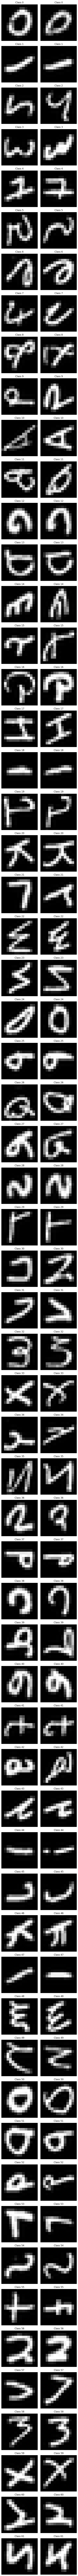

In [ ]:
def plot_random_images(X_data, y_data, num_classes=62, images_per_class=2):
    total_images = num_classes * images_per_class
    cols = min(images_per_class, 5)
    rows = (total_images + cols - 1) // cols
    plt.figure(figsize=(cols * 3, rows * 3))
    for i in range(num_classes):
        indices = np.where(y_data == i)[0]
        sample_indices = np.random.choice(indices, min(images_per_class, len(indices)), replace=False)

        for j, idx in enumerate(sample_indices):
            subplot_idx = i * images_per_class + j + 1
            plt.subplot(rows, cols, subplot_idx)
            plt.imshow(X_data[idx].reshape(14, 14), cmap='gray')
            plt.title(f'Class {i}')
            plt.axis('off')

    plt.tight_layout()
    plt.show()
X_train_reshaped = X_train.values.reshape(-1, 14, 14)
plot_random_images(X_train_reshaped, y_train, num_classes=62, images_per_class=2)


Plot Bar Graph of Class Distribution

<ipython-input-13-9b126cf8d97e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts_train.index, y=class_counts_train.values, palette='viridis')
<ipython-input-13-9b126cf8d97e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts_test.index, y=class_counts_test.values, palette='viridis')


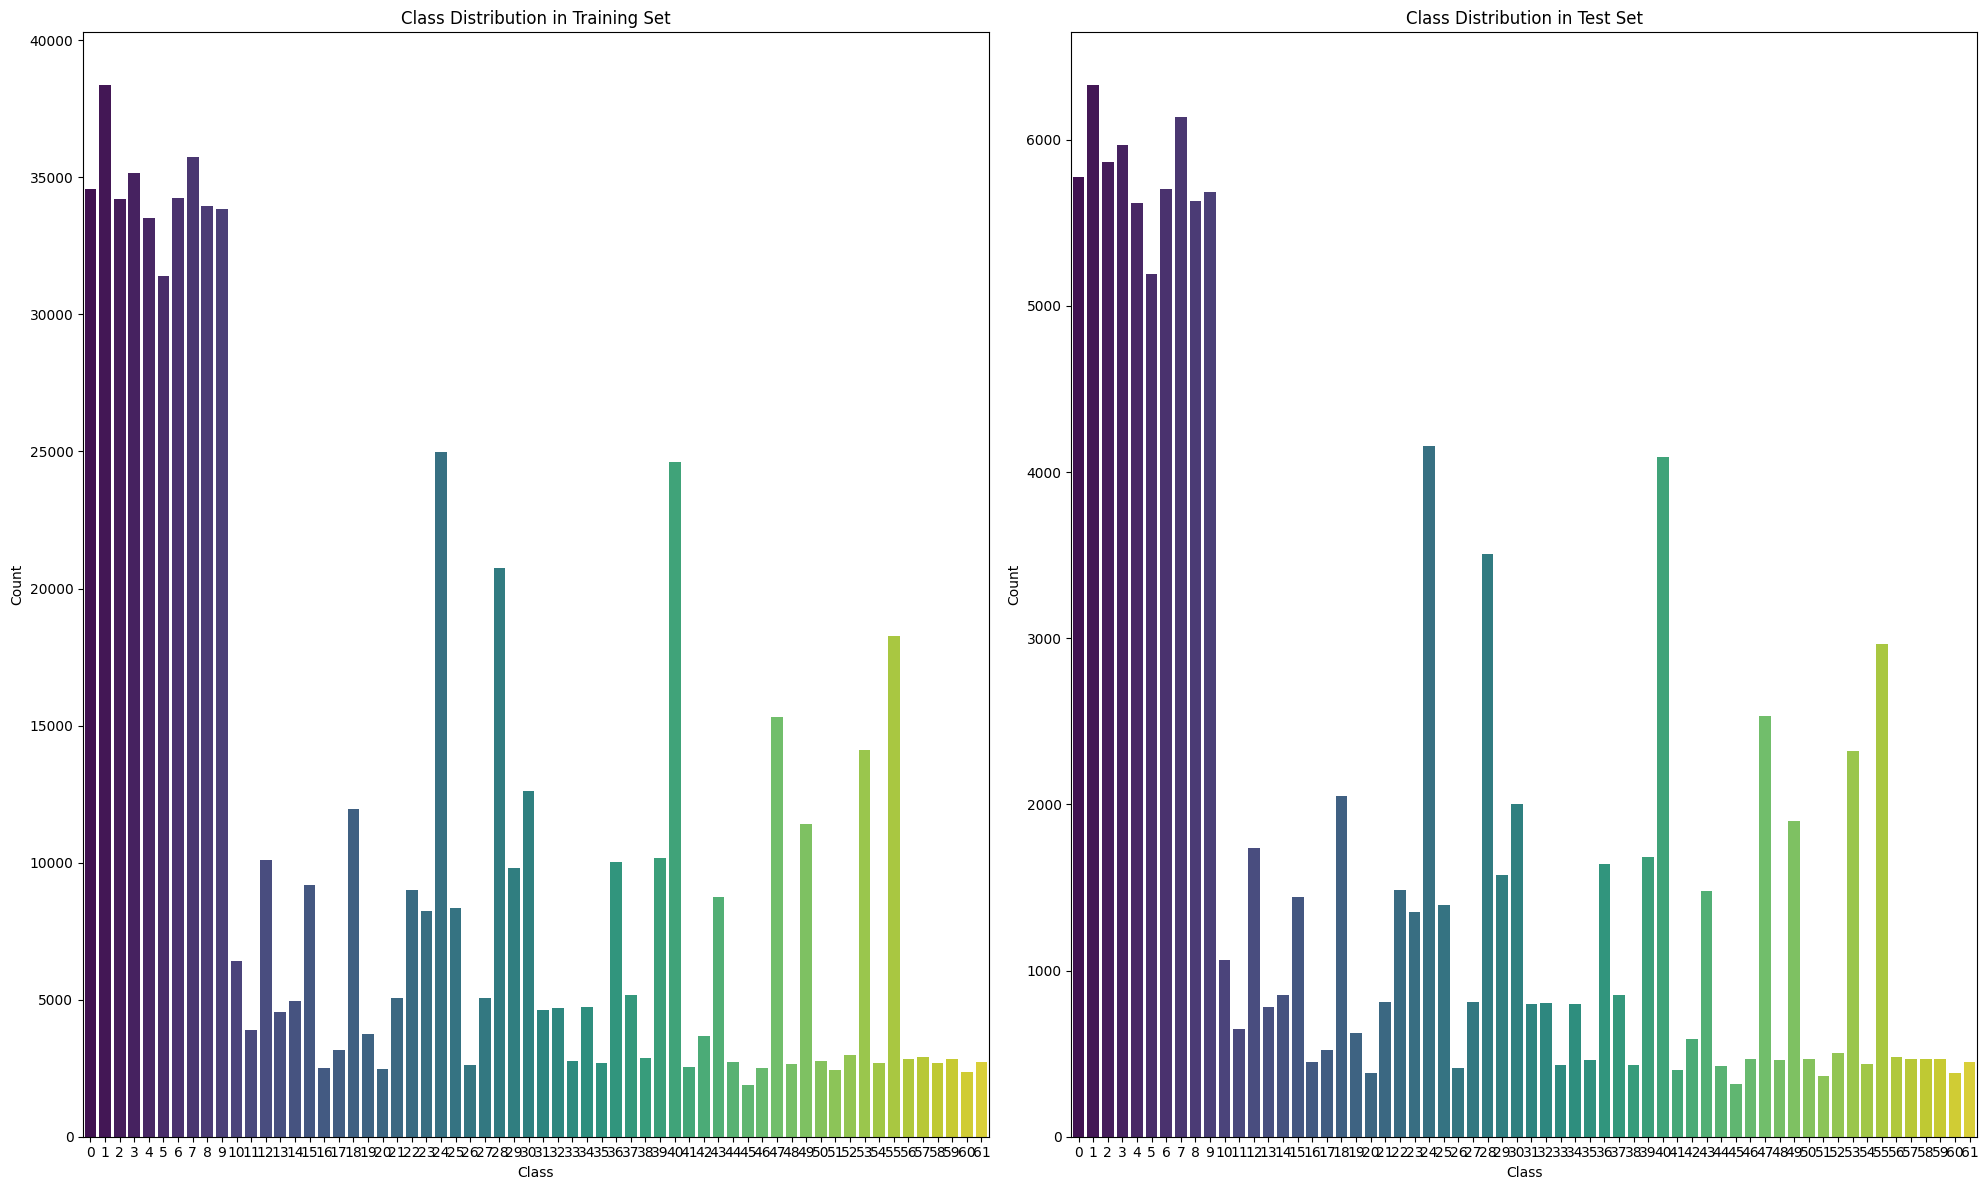

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class_counts_train = pd.Series(y_train).value_counts().sort_index()
class_counts_test = pd.Series(y_test).value_counts().sort_index()
plt.figure(figsize=(20, 12))

plt.subplot(1, 2, 1)
sns.barplot(x=class_counts_train.index, y=class_counts_train.values, palette='viridis')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.barplot(x=class_counts_test.index, y=class_counts_test.values, palette='viridis')
plt.title('Class Distribution in Test Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Plot Pie Graph of Class Distribution

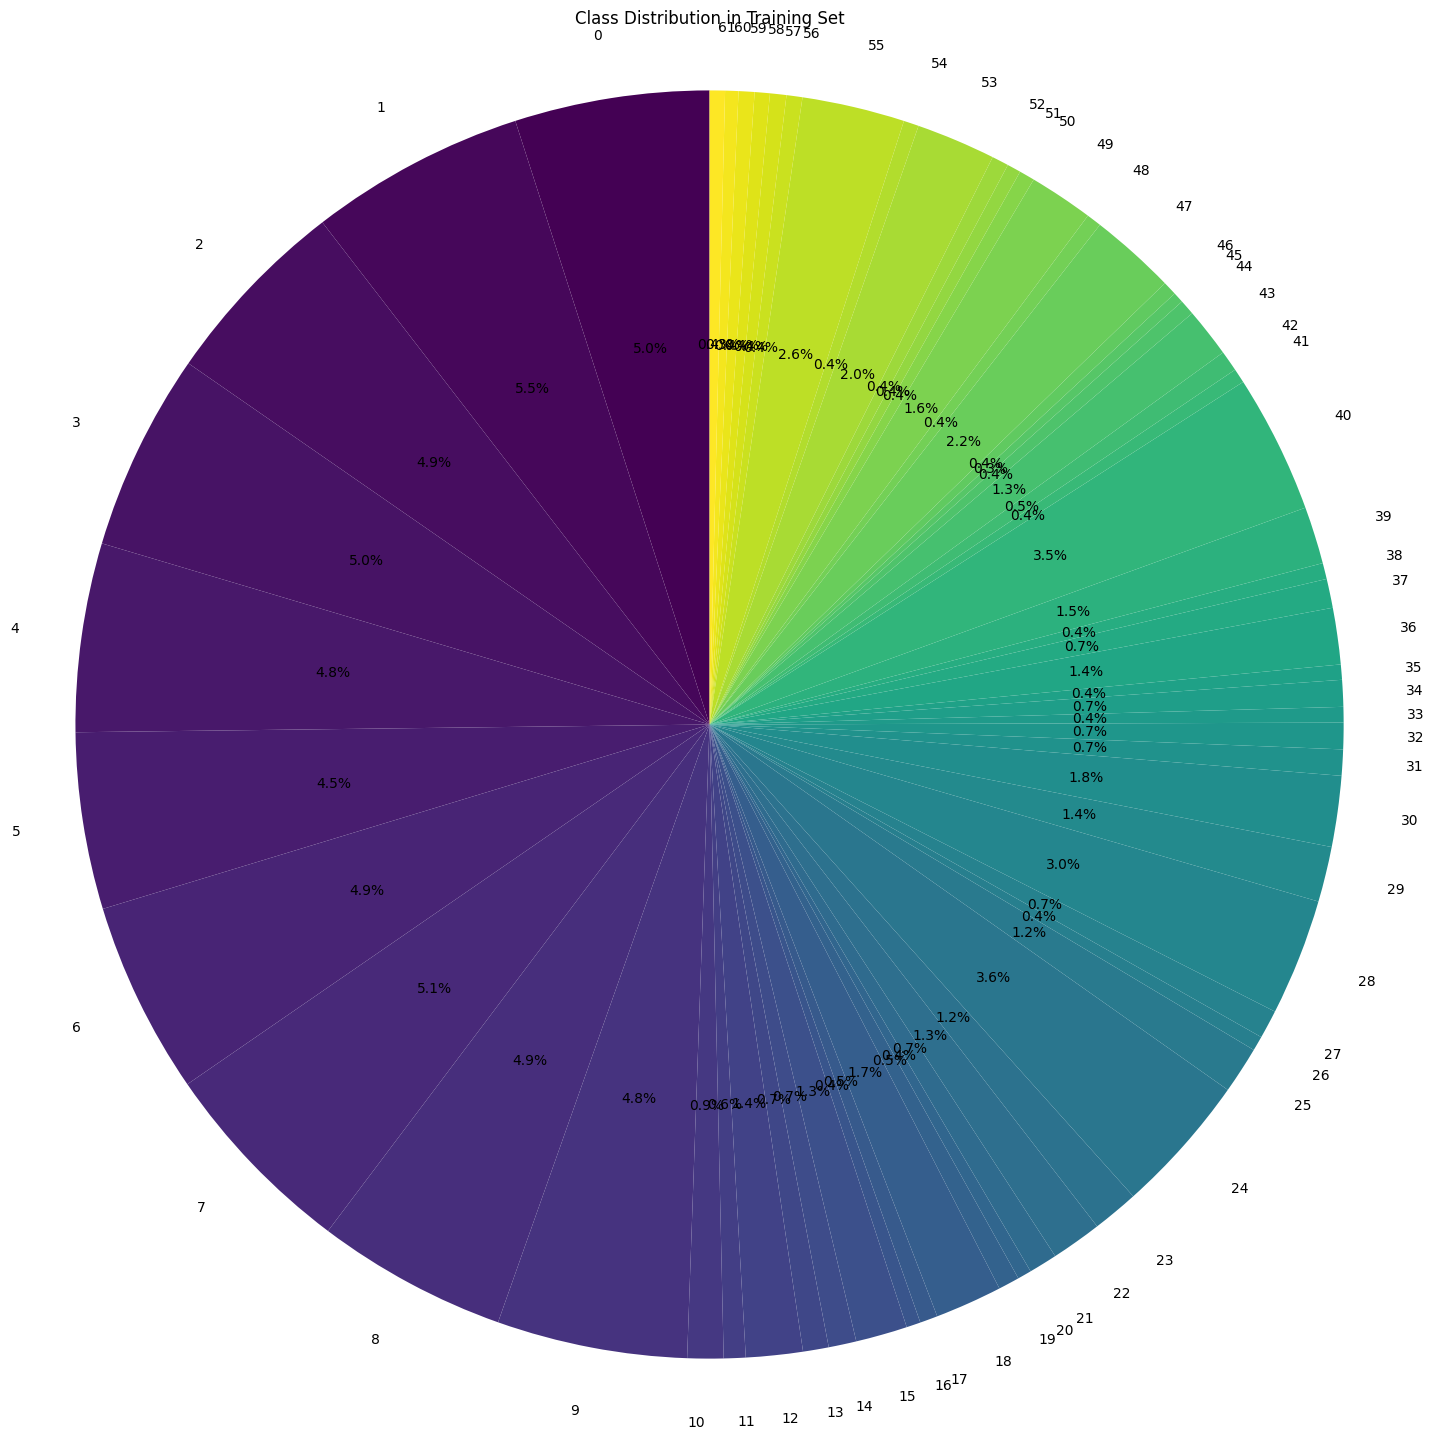

In [ ]:
def plot_class_distribution_pie(class_counts, title='Class Distribution'):
    plt.figure(figsize=(18, 18))
    colors = plt.cm.viridis(np.linspace(0, 1, len(class_counts)))

    plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(title)
    plt.axis('equal')
    plt.show()
plot_class_distribution_pie(class_counts_train, title="Class Distribution in Training Set")

Box Plot For Outlier Checking

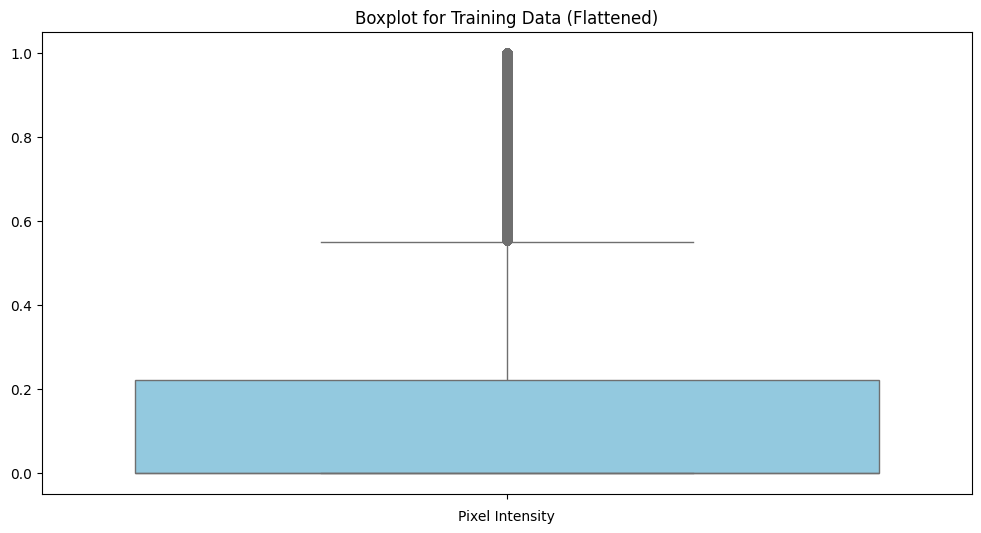

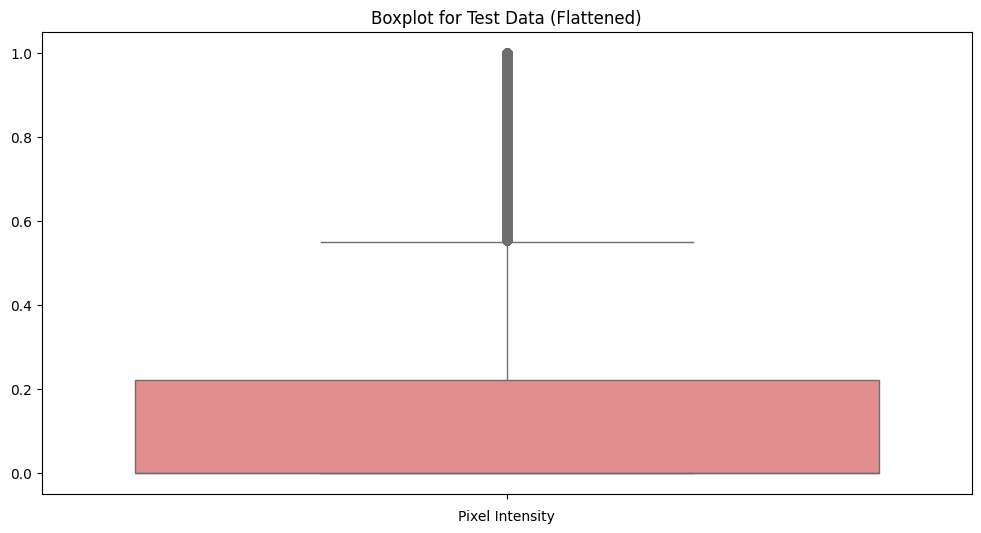

In [ ]:
X_test_reshaped = X_test.values.reshape(-1, 14, 14)

# Boxplot for training data
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_reshaped.flatten(), color='skyblue')
plt.title('Boxplot for Training Data (Flattened)')
plt.xlabel('Pixel Intensity')
plt.show()

# Boxplot for test data
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_test_reshaped.flatten(), color='lightcoral')
plt.title('Boxplot for Test Data (Flattened)')
plt.xlabel('Pixel Intensity')
plt.show()

IMPLEMENTING MODEL ACCORDING TO OUR DATA SET CONTEXT

# Classification Model

# 1)Logistics Regression

In [ ]:
#Fit logistics regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
# Evaluate the Model: Training and Testing Accuracy
# Training Accuracy
train_accuracy = log_reg.score(X_train, y_train)
train_error = 1 - train_accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Error: {train_error:.2f}")

# Testing Accuracy
test_accuracy = log_reg.score(X_test, y_test)
test_error = 1 - test_accuracy
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Error: {test_error:.2f}")



Training Accuracy: 0.72
Training Error: 0.28
Test Accuracy: 0.72
Test Error: 0.28


In [ ]:
# Generate Predictions and Metrics
# Predict on the test data
y_pred = log_reg.predict(X_test)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.77      0.70      5778
           1       0.57      0.92      0.71      6330
           2       0.83      0.87      0.85      5869
           3       0.86      0.91      0.88      5969
           4       0.73      0.81      0.77      5619
           5       0.74      0.76      0.75      5190
           6       0.86      0.92      0.89      5705
           7       0.91      0.93      0.92      6139
           8       0.77      0.85      0.81      5633
           9       0.84      0.91      0.87      5686
          10       0.65      0.68      0.66      1062
          11       0.68      0.45      0.54       648
          12       0.63      0.71      0.67      1739
          13       0.70      0.58      0.64       779
          14       0.79      0.59      0.67       851
          15       0.62      0.67      0.64      1440
          16       0.77      0.53      0.63       447
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm
class_labels = [f'Class {i}' for i in range(62)]
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(180, 160))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='coolwarm', cbar=True,
            xticklabels=class_labels, yticklabels=class_labels)

plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Normalized Confusion Matrix')
plt.show()

# **2)Softmax Regression**

In [ ]:
# Fit the Softmax Regression Model
softmax_model = LogisticRegression(solver='lbfgs', multi_class='multinomial',  C=1.0,max_iter=1000)
softmax_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
# Evaluate the Model: Training and Testing Accuracy
# Training Accuracy
train_accuracy = softmax_model.score(X_train, y_train)
train_error = 1 - train_accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Error: {train_error:.2f}")

# Testing Accuracy
test_accuracy = softmax_model.score(X_test, y_test)
test_error = 1 - test_accuracy
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Error: {test_error:.2f}")


Training Accuracy: 0.73
Training Error: 0.27
Test Accuracy: 0.73
Test Error: 0.27


In [ ]:
# Generate Predictions and Metrics
# Predict on the test data
y_pred = softmax_model.predict(X_test)
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.78      0.71      5778
           1       0.59      0.90      0.71      6330
           2       0.84      0.88      0.86      5869
           3       0.87      0.91      0.89      5969
           4       0.74      0.82      0.78      5619
           5       0.76      0.75      0.76      5190
           6       0.86      0.93      0.89      5705
           7       0.92      0.93      0.93      6139
           8       0.79      0.85      0.82      5633
           9       0.83      0.92      0.87      5686
          10       0.67      0.69      0.68      1062
          11       0.67      0.47      0.55       648
          12       0.63      0.72      0.67      1739
          13       0.71      0.59      0.65       779
          14       0.77      0.60      0.67       851
          15       0.61      0.68      0.64      1440
          16       0.75      0.57      0.65       447
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm
class_labels = [f'Class {i}' for i in range(62)]
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(180, 160))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='coolwarm', cbar=True,
            xticklabels=class_labels, yticklabels=class_labels)

plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Normalized Confusion Matrix')
plt.show()

# **3)Decision Trees**

In [ ]:
#fit  model
tree_clf = DecisionTreeClassifier(max_depth=16,random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=16, random_state=42)

In [ ]:
# Evaluate the Model: Training and Testing Accuracy
# Training Accuracy
train_accuracy = tree_clf.score(X_train, y_train)
train_error = 1 - train_accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Error: {train_error:.2f}")

# Testing Accuracy
test_accuracy = tree_clf.score(X_test, y_test)
test_error = 1 - test_accuracy
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Error: {test_error:.2f}")


Training Accuracy: 0.81
Training Error: 0.19
Test Accuracy: 0.71
Test Error: 0.29


In [ ]:
# Generate Predictions and Metrics
# Predict on the test data
y_pred = tree_clf.predict(X_test)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.77      0.68      5778
           1       0.65      0.87      0.74      6330
           2       0.82      0.85      0.83      5869
           3       0.87      0.86      0.86      5969
           4       0.81      0.83      0.82      5619
           5       0.75      0.76      0.75      5190
           6       0.86      0.89      0.88      5705
           7       0.92      0.93      0.93      6139
           8       0.75      0.81      0.78      5633
           9       0.84      0.90      0.87      5686
          10       0.61      0.67      0.64      1062
          11       0.39      0.31      0.35       648
          12       0.65      0.75      0.70      1739
          13       0.59      0.45      0.51       779
          14       0.61      0.49      0.54       851
          15       0.59      0.64      0.62      1440
          16       0.54      0.36      0.43       447
   

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm
class_labels = [f'Class {i}' for i in range(62)]
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(180, 160))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='coolwarm', cbar=True,
            xticklabels=class_labels, yticklabels=class_labels)

plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Normalized Confusion Matrix')
plt.show()

# **4)Random Forest**

In [ ]:
#fit mpodel
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=20, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=20, n_estimators=500, n_jobs=-1)

In [ ]:

# Evaluate the Model: Training and Testing Accuracy
# Training Accuracy
train_accuracy = rnd_clf.score(X_train, y_train)
train_error = 1 - train_accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Error: {train_error:.2f}")

# Testing Accuracy
test_accuracy = rnd_clf.score(X_test, y_test)
test_error = 1 - test_accuracy
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Error: {test_error:.2f}")


Training Accuracy: 0.48
Training Error: 0.52
Test Accuracy: 0.48
Test Error: 0.52


In [ ]:
# Generate Predictions and Metrics
# Predict on the test data
y_pred = rnd_clf.predict(X_test)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm


Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.92      0.54      5778
           1       0.43      0.97      0.60      6330
           2       0.49      0.82      0.61      5869
           3       0.54      0.87      0.67      5969
           4       0.36      0.85      0.51      5619
           5       0.61      0.65      0.63      5190
           6       0.49      0.92      0.64      5705
           7       0.64      0.89      0.74      6139
           8       0.46      0.63      0.53      5633
           9       0.52      0.86      0.65      5686
          10       0.00      0.00      0.00      1062
          11       0.00      0.00      0.00       648
          12       0.85      0.03      0.05      1739
          13       0.00      0.00      0.00       779
          14       0.00      0.00      0.00       851
          15       0.00      0.00      0.00      1440
          16       0.00      0.00      0.00       447
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([[5342,   15,   31, ...,    0,    0,    0],
       [   0, 6113,    6, ...,    0,    0,    0],
       [ 118,   45, 4807, ...,    0,    0,    0],
       ...,
       [   0,   15,  194, ...,    0,    0,    0],
       [   1,   21,    4, ...,    0,    0,    0],
       [   0,    1,  281, ...,    0,    0,    0]])

# 2 Layer Classifier

In [ ]:
#Sampling
sample_train_ds=train_ds.sample(200000)

In [ ]:
X_train=sample_train_ds.iloc[:, :-1]
y_train=sample_train_ds.iloc[:, -1]
print(X_train.shape)
print(y_train.shape)

(200000, 196)
(200000,)


In [ ]:
X_train=train_ds.iloc[:, :-1]
y_train=train_ds.iloc[:, -1]
print(X_train.shape)
print(y_train.shape)

(697932, 196)
(697932,)


In [ ]:
# Create a mask for the range 0 to 9 in the last column
mask = train_ds.iloc[:, -1].isin(range(0, 10))

# Apply the mask to filter rows for X_train and y_train
X_train_dgt = X_train[mask]
y_train_dgt = y_train[mask]

# Display the filtered data
# y_train_dgt


In [ ]:
# Create a mask for the range 0 to 9 in the last column
mask = test_ds.iloc[:, -1].isin(range(0, 10))

# Apply the mask to filter rows for X_train and y_train
X_test_dgt = X_test[mask]
y_test_dgt = y_test[mask]

# Display the filtered data
# y_test_dgt


In [ ]:
# Create a mask for the range A to Z in the last column
mask = train_ds.iloc[:, -1].isin(range(10,36))

# Apply the mask to filter rows for X_train and y_train
X_train_caps = X_train[mask]
y_train_caps = y_train[mask]

# Display the filtered data
# y_train_caps


In [ ]:
# Create a mask for the range A to Z in the last column
mask = test_ds.iloc[:, -1].isin(range(10, 36))

# Apply the mask to filter rows for X_train and y_train
X_test_caps = X_test[mask]
y_test_caps = y_test[mask]

# Display the filtered data
# y_test_caps


In [ ]:
# Create a mask for the range a to z in the last column
mask = train_ds.iloc[:, -1].isin(range(36, 61))

# Apply the mask to filter rows for X_train and y_train
X_train_small = X_train[mask]
y_train_small = y_train[mask]

# Display the filtered data
# y_train_small


In [ ]:
# Create a mask for the range a to z in the last column
mask = test_ds.iloc[:, -1].isin(range(36, 61))

# Apply the mask to filter rows for X_train and y_train
X_test_small = X_test[mask]
y_test_small = y_test[mask]

# Display the filtered data
# y_test_small


In [ ]:
X_train_dgt1=X_train_dgt.copy()
X_train_caps1=X_train_caps.copy()
X_train_small1=X_train_small.copy()

In [ ]:
X_test_dgt1=X_test_dgt.copy()
X_test_caps1=X_test_caps.copy()
X_test_small1=X_test_small.copy()

In [ ]:
X_train_dgt1['196']=0
X_train_caps1['196']=1
X_train_small1['196']=2

In [ ]:
X_test_dgt1['196']=0
X_test_caps1['196']=1
X_test_small1['196']=2

In [ ]:
train_layer1=pd.concat([X_train_dgt1,X_train_caps1,X_train_small1])
test_layer1=pd.concat([X_test_dgt1,X_test_caps1,X_test_small1])

In [ ]:
X_tr_layer1=train_layer1.iloc[:,:-1]
y_tr_layer1=train_layer1.iloc[:,-1]
X_ts_layer1=test_layer1.iloc[:,:-1]
y_ts_layer1=test_layer1.iloc[:,-1]

In [ ]:
X_tr_layer1=X_tr_layer1.to_numpy()
y_tr_layer1=y_tr_layer1.to_numpy()
X_ts_layer1=X_ts_layer1.to_numpy()
y_ts_layer1=y_ts_layer1.to_numpy()
X_train_dgt=X_train_dgt.to_numpy()
y_train_dgt=y_train_dgt.to_numpy()
X_test_dgt=X_test_dgt.to_numpy()
y_test_dgt=y_test_dgt.to_numpy()
X_train_caps=X_train_caps.to_numpy()
y_train_caps=y_train_caps.to_numpy()
X_test_caps=X_test_caps.to_numpy()
y_test_caps=y_test_caps.to_numpy()
X_train_small=X_train_small.to_numpy()
y_train_small=y_train_small.to_numpy()
X_test_small=X_test_small.to_numpy()
y_test_small=y_test_small.to_numpy()

In [ ]:
#standerized
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tr_layer1 = scaler.fit_transform(X_tr_layer1)
X_ts_layer1 = scaler.transform(X_ts_layer1)

In [ ]:
print(X_tr_layer1.shape)
print(y_tr_layer1.shape)
print(X_ts_layer1.shape)
print(y_ts_layer1.shape)

(695207, 196)
(695207,)
(115872, 196)
(115872,)


# Softmaxregression

In [ ]:
# Train the 1st layer
model_layer1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',  C=1.0,max_iter=1000)
model_layer1.fit(X_tr_layer1, y_tr_layer1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
# Evaluate the Model: Training and Testing Accuracy
# Training Accuracy
train_accuracy = model_layer1.score(X_tr_layer1, y_tr_layer1)
train_error = 1 - train_accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Error: {train_error:.2f}")

# Testing Accuracy
test_accuracy = model_layer1.score(X_ts_layer1, y_ts_layer1)
test_error = 1 - test_accuracy
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Error: {test_error:.2f}")


Training Accuracy: 0.65
Training Error: 0.35
Test Accuracy: 0.65
Test Error: 0.35


In [ ]:
# Generate Predictions and Metrics
# Predict on the test data
y_pred_layer1 = model_layer1.predict(X_ts_layer1)

# Classification Report
print("Classification Report:\n", classification_report(y_ts_layer1, y_pred_layer1)) # Use y_pred_layer1 and y_ts_layer1

# Confusion Matrix
cm = confusion_matrix(y_ts_layer1, y_pred_layer1) # Use y_pred_layer1
cm

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.85      0.76     57918
           1       0.57      0.40      0.47     31346
           2       0.60      0.49      0.54     26608

    accuracy                           0.65    115872
   macro avg       0.62      0.58      0.59    115872
weighted avg       0.64      0.65      0.63    115872



array([[49492,  5258,  3168],
       [13107, 12676,  5563],
       [ 9199,  4267, 13142]])

In [ ]:
# Train the 2nd layer with digits
model_layer1_dgt = LogisticRegression(solver='lbfgs', multi_class='multinomial',  C=1.0,max_iter=1000)
model_layer1_dgt.fit(X_train_dgt, y_train_dgt)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
# Evaluate the Model: Training and Testing Accuracy
# Training Accuracy
train_accuracy = model_layer1_dgt.score(X_train_dgt, y_train_dgt)
train_error = 1 - train_accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Error: {train_error:.2f}")

# Testing Accuracy
test_accuracy = model_layer1_dgt.score(X_test_dgt, y_test_dgt)
test_error = 1 - test_accuracy
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Error: {test_error:.2f}")

Training Accuracy: 0.94
Training Error: 0.06
Test Accuracy: 0.94
Test Error: 0.06


In [ ]:
# Generate Predictions and Metrics
# Predict on the test data
y_pred_dgt = model_layer1_dgt.predict(X_test_dgt)

# Classification Report
print("Classification Report:\n", classification_report(y_test_dgt, y_pred_dgt)) # Use y_pred_layer1 and y_ts_layer1

# Confusion Matrix
cm = confusion_matrix(y_test_dgt, y_pred_dgt) # Use y_pred_layer1
cm

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      5778
           1       0.96      0.96      0.96      6330
           2       0.95      0.93      0.94      5869
           3       0.93      0.93      0.93      5969
           4       0.94      0.94      0.94      5619
           5       0.92      0.90      0.91      5190
           6       0.96      0.97      0.97      5705
           7       0.96      0.95      0.96      6139
           8       0.91      0.91      0.91      5633
           9       0.92      0.93      0.92      5686

    accuracy                           0.94     57918
   macro avg       0.94      0.94      0.94     57918
weighted avg       0.94      0.94      0.94     57918



array([[5577,   19,   21,   12,   52,   28,   21,    8,   34,    6],
       [   7, 6078,   19,   42,   20,   20,   18,   16,  102,    8],
       [  47,   28, 5469,   70,   48,   29,   45,   21,  103,    9],
       [  22,    6,   74, 5569,    9,  129,    3,   45,   68,   44],
       [  20,   18,   44,    0, 5265,    7,   57,    3,   47,  158],
       [  69,   15,   36,  153,   47, 4677,   52,   16,   88,   37],
       [  30,   25,   18,    1,   28,   40, 5547,    0,   16,    0],
       [   5,   10,   13,   10,   28,    8,    0, 5849,   23,  193],
       [  34,   95,   48,   85,   44,  122,   23,    8, 5136,   38],
       [  14,   13,    4,   64,   90,    6,    0,  143,   41, 5311]])

In [ ]:
# Train the 2nd layer with caps
model_layer1_caps = LogisticRegression(solver='lbfgs', multi_class='multinomial',  C=1.0,max_iter=1000)
model_layer1_caps.fit(X_train_caps, y_train_caps)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
# Evaluate the Model: Training and Testing Accuracy
# Training Accuracy
train_accuracy = model_layer1_caps.score(X_train_caps, y_train_caps)
train_error = 1 - train_accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Error: {train_error:.2f}")

# Testing Accuracy
test_accuracy = model_layer1_caps.score(X_test_caps, y_test_caps)
test_error = 1 - test_accuracy
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Error: {test_error:.2f}")

Training Accuracy: 0.86
Training Error: 0.14
Test Accuracy: 0.86
Test Error: 0.14


In [ ]:
# Generate Predictions and Metrics
# Predict on the test data
y_pred_caps = model_layer1_caps.predict(X_test_caps)

# Classification Report
print("Classification Report:\n", classification_report(y_test_caps, y_pred_caps)) # Use y_pred_layer1 and y_ts_layer1

# Confusion Matrix
cm = confusion_matrix(y_test_caps, y_pred_caps) # Use y_pred_layer1
cm

Classification Report:
               precision    recall  f1-score   support

          10       0.81      0.84      0.83      1062
          11       0.82      0.78      0.80       648
          12       0.88      0.88      0.88      1739
          13       0.82      0.75      0.79       779
          14       0.85      0.76      0.80       851
          15       0.82      0.82      0.82      1440
          16       0.83      0.76      0.79       447
          17       0.77      0.70      0.74       521
          18       0.89      0.91      0.90      2048
          19       0.78      0.73      0.75       626
          20       0.68      0.68      0.68       382
          21       0.89      0.92      0.91       810
          22       0.90      0.92      0.91      1485
          23       0.78      0.79      0.79      1351
          24       0.91      0.96      0.93      4156
          25       0.87      0.90      0.89      1397
          26       0.79      0.71      0.75       413
   

array([[ 889,    6,    0,    1,    4,   20,    5,   19,    6,    0,    3,
           2,   29,   11,   13,    8,    5,   17,    5,    0,    7,    2,
           6,    3,    1,    0],
       [  12,  503,    6,    9,   10,    4,    2,    0,    6,    2,    0,
           0,    3,    2,   15,    3,    2,    9,   36,    0,   11,    1,
           1,    3,    4,    4],
       [   0,    6, 1525,    0,   15,    8,    7,    0,    4,    3,    8,
          24,    0,    5,   63,   17,    6,   13,   11,    3,   16,    0,
           0,    2,    1,    2],
       [   1,    6,    2,  585,    0,    1,    0,    1,    3,    3,    2,
           1,    3,    4,  136,    4,    2,    0,   10,    0,    7,    0,
           1,    0,    1,    6],
       [   3,   18,   58,    3,  649,   22,   10,    0,    6,    4,    7,
           7,    0,    3,    8,    0,    1,   25,   15,    0,    2,    0,
           3,    1,    3,    3],
       [  13,    0,   11,    3,    6, 1184,    6,    2,   12,    3,    1,
           6,    4,  

In [ ]:
# Train the 2nd layer with small
model_layer1_small = LogisticRegression(solver='lbfgs', multi_class='multinomial',  C=1.0,max_iter=1000)
model_layer1_small.fit(X_train_small, y_train_small)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
# Evaluate the Model: Training and Testing Accuracy
# Training Accuracy
train_accuracy = model_layer1_small.score(X_train_small, y_train_small)
train_error = 1 - train_accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Error: {train_error:.2f}")

# Testing Accuracy
test_accuracy = model_layer1_small.score(X_test_small, y_test_small)
test_error = 1 - test_accuracy
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Error: {test_error:.2f}")

Training Accuracy: 0.83
Training Error: 0.17
Test Accuracy: 0.82
Test Error: 0.18


In [ ]:
# Generate Predictions and Metrics
# Predict on the test data
y_pred_small = model_layer1_small.predict(X_test_small)

# Classification Report
print("Classification Report:\n", classification_report(y_test_small, y_pred_small)) # Use y_pred_layer1 and y_ts_layer1

# Confusion Matrix
cm = confusion_matrix(y_test_small, y_pred_small) # Use y_pred_layer1
cm

Classification Report:
               precision    recall  f1-score   support

          36       0.77      0.80      0.79      1644
          37       0.86      0.86      0.86       853
          38       0.81      0.74      0.78       432
          39       0.88      0.91      0.89      1683
          40       0.92      0.92      0.92      4092
          41       0.79      0.72      0.76       400
          42       0.58      0.52      0.55       589
          43       0.83      0.84      0.83      1479
          44       0.49      0.26      0.34       427
          45       0.72      0.69      0.71       317
          46       0.71      0.53      0.61       466
          47       0.82      0.91      0.86      2535
          48       0.86      0.86      0.86       464
          49       0.86      0.87      0.87      1898
          50       0.84      0.84      0.84       466
          51       0.79      0.79      0.79       368
          52       0.56      0.48      0.51       505
   

array([[1321,    1,    5,   38,   90,    2,   18,    9,    4,    2,    4,
           2,    1,   52,   26,    3,   17,    1,    3,   25,    9,    2,
           4,    5,    0],
       [   1,  735,    0,   20,    3,    0,   10,   42,    7,   10,    3,
           3,    1,    0,    3,    0,    0,    0,    4,   10,    1,    0,
           0,    0,    0],
       [  12,    1,  321,    2,   67,    0,    3,    0,    0,    1,    1,
           1,    0,    2,    7,    0,    0,    1,    0,    6,    7,    0,
           0,    0,    0],
       [  15,   18,    1, 1531,    7,    0,    2,   23,    1,   11,    8,
          32,    1,    5,    5,    1,    2,    1,    0,    7,    5,    3,
           2,    1,    1],
       [  79,    3,   47,    9, 3746,    4,    4,    5,    2,    0,    4,
           5,    2,    6,    5,    8,    6,   23,    5,  109,   13,    1,
           4,    2,    0],
       [   3,    1,    2,    4,    2,  289,    2,    6,    2,    1,    1,
           6,    1,    0,    0,   16,    6,   11,  

In [ ]:
#combined model and predict
def predict(X):
  preds=[]
  X=X.values
  for i in range(X.shape[0]):
    c=model_layer1.predict(X[i].reshape(1,-1))
    if c==0:
      preds.append(model_layer1_dgt.predict(X[i].reshape(1,-1)))
    elif c==1:
      preds.append(model_layer1_caps.predict(X[i].reshape(1,-1)))
    else:
      preds.append(model_layer1_small.predict(X[i].reshape(1,-1)))

  return np.array(preds)


In [ ]:
y_pred_all=predict(X_test)

In [ ]:
y_pred_all.shape

(116323, 1)

In [ ]:
print(classification_report(y_test, y_pred_all))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_all) # Use y_pred_layer1
cm

              precision    recall  f1-score   support

           0       0.49      0.65      0.56      5778
           1       0.51      0.90      0.65      6330
           2       0.63      0.80      0.70      5869
           3       0.77      0.92      0.84      5969
           4       0.60      0.74      0.66      5619
           5       0.52      0.76      0.62      5190
           6       0.63      0.80      0.70      5705
           7       0.80      0.95      0.87      6139
           8       0.64      0.83      0.72      5633
           9       0.71      0.93      0.80      5686
          10       0.49      0.38      0.42      1062
          11       0.34      0.18      0.24       648
          12       0.42      0.54      0.47      1739
          13       0.30      0.07      0.11       779
          14       0.39      0.55      0.46       851
          15       0.49      0.34      0.40      1440
          16       0.19      0.16      0.17       447
          17       0.36    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([[3782,   19,   13, ...,    0,    0,    0],
       [   4, 5719,   13, ...,   10,    0,    0],
       [  37,   25, 4686, ...,   20,    0,    0],
       ...,
       [   0,   56,   15, ...,   79,    0,    0],
       [   4,   30,    1, ...,    4,    9,    0],
       [   0,    3,  177, ...,   36,    0,    0]])